In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import metrics

In [7]:
df = pd.read_csv('/content/Corona_NLP_train.csv', encoding='latin1')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [9]:
df.iloc[0:2]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive


In [10]:
df.loc[0]

UserName                                                      3799
ScreenName                                                   48751
Location                                                    London
TweetAt                                                 16-03-2020
OriginalTweet    @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
Sentiment                                                  Neutral
Name: 0, dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [12]:
df['Sentiment']

0                   Neutral
1                  Positive
2                  Positive
3                  Positive
4        Extremely Negative
                ...        
41152               Neutral
41153    Extremely Negative
41154              Positive
41155               Neutral
41156              Negative
Name: Sentiment, Length: 41157, dtype: object

In [13]:
#computing the possible sentiment values
possible_sentiment = df.Sentiment.unique()
print("The possible sentiments: ", str (possible_sentiment))


The possible sentiments:  ['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']


In [14]:
sentiment_counts = df.Sentiment.value_counts()
print(sentiment_counts)


Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64


In [15]:
second_popular_sentiment = list(sentiment_counts.items())[1][0]
print('The most popular sentiment:', second_popular_sentiment)

The most popular sentiment: Negative


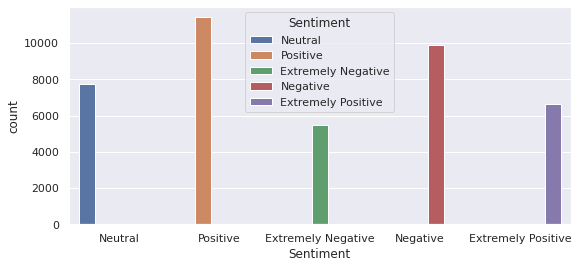

In [16]:
plt.figure(figsize=(9,4))
sns.set_theme(style="darkgrid")
sns.countplot(x = 'Sentiment', hue='Sentiment', data= df)
plt.show()

In [17]:
#date with the greatest number of extremely positive tweets.

extremely_positive_tweets = df[df["Sentiment"] == "Extremely Positive"]
tweets1 = list(extremely_positive_tweets['TweetAt'].value_counts().items())[0][0]
print('Date with the greatest amount of tweets of extremely positive on:', tweets1 )

Date with the greatest amount of tweets of extremely positive on: 25-03-2020


In [18]:
#same as above
tweets2 = extremely_positive_tweets['TweetAt'].value_counts().index.tolist()[0]
print('Date with the greatest amount of tweets of extremely positive on:', tweets2 )


Date with the greatest amount of tweets of extremely positive on: 25-03-2020


In [19]:
df['OriginalTweet']

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

In [20]:
non_alphabetical = df['OriginalTweet'].str.replace('[^a-zA-Z]', ' ', regex=True)
#spaces = non_alphabetical.str.strip()
print(non_alphabetical)

0         MeNyrbie  Phil Gahan  Chrisitv https   t co i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia  Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me  ready to go at supermarket during the  COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know it  s getting tough when  KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156     TartiiCat Well new used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object


In [21]:
#non-alphabetical characters with whitespaces
non_alphabetical = df['OriginalTweet'].str.replace('[^a-zA-Z]', ' ', regex=True)
spaces = non_alphabetical.str.replace('\s+', ' ', regex=True)
print(spaces)

0         MeNyrbie Phil Gahan Chrisitv https t co iFz F...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia Woolworths to give elder...
3        My food stock is not the only one which is emp...
4        Me ready to go at supermarket during the COVID...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know it s getting tough when KameronWilds ...
41155    Is it wrong that the smell of hand sanitizer i...
41156     TartiiCat Well new used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object


In [22]:
lower_case = spaces.str.lower()
print(lower_case)

0         menyrbie phil gahan chrisitv https t co ifz f...
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the covid...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know it s getting tough when kameronwilds ...
41155    is it wrong that the smell of hand sanitizer i...
41156     tartiicat well new used rift s are going for ...
Name: OriginalTweet, Length: 41157, dtype: object


In [23]:
#Tokenize the tweets
tokenize_tweets = lower_case.str.split(expand = True).stack().value_counts()
print(tokenize_tweets)

the                   44919
to                    38509
t                     29901
co                    24153
and                   24107
                      ...  
hgb                       1
ipvf                      1
globalsupplychains        1
trop                      1
yqcznmizdg                1
Length: 80071, dtype: int64


In [24]:
#count the total number of all words and distinct 
total = sum(tokenize_tweets)
print("The total number of all words:", total)
print("Total no. of distinct words:", len(set(tokenize_tweets)))

The total number of all words: 1350959
Total no. of distinct words: 700


In [25]:
#the 10 most frequent words in the corpus.
print("The top 10 most frequent words:")
print(tokenize_tweets[:10])

The top 10 most frequent words:
the      44919
to       38509
t        29901
co       24153
and      24107
https    24007
covid    23238
of       21570
a        19964
in       19359
dtype: int64


In [26]:
#Remove stop words, words with <= 2 characters
stop_words = lower_case.str.findall('\w{3,}').str.join(' ')
print(stop_words)


0        menyrbie phil gahan chrisitv https ifz fan and...
1        advice talk your neighbours family exchange ph...
2        coronavirus australia woolworths give elderly ...
3        food stock not the only one which empty please...
4        ready supermarket during the covid outbreak no...
                               ...                        
41152    airline pilots offering stock supermarket shel...
41153    response complaint not provided citing covid r...
41154    you know getting tough when kameronwilds ratio...
41155    wrong that the smell hand sanitizer starting t...
41156    tartiicat well new used rift are going for ama...
Name: OriginalTweet, Length: 41157, dtype: object


In [27]:
#Tokenize
stop_words_tweets = stop_words.str.split(expand = True).stack().value_counts()
#recounting the total number of words
total_sum = sum(stop_words_tweets)
print("The total sum of all words:", total_sum)


#the 10 most frequent words in the modified corpus

print("The top 10 most frequent words:")
print(stop_words_tweets[:10])

The total sum of all words: 1045810
The top 10 most frequent words:
the            44919
and            24107
https          24007
covid          23238
coronavirus    18210
for            14063
are            11353
you            10063
this            8001
prices          7959
dtype: int64


In [28]:
#Multinomial Naive Bayes classiifer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

corpus = np.array(df["OriginalTweet"])
target = np.array(df.Sentiment)
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)

clf = MultinomialNB()
clf.fit(X, target)

#class predications
class_pred = clf.predict(X)
print("Actual")
print(df['Sentiment'][:10])
print("predicted")
print(class_pred[:10])




Actual
0               Neutral
1              Positive
2              Positive
3              Positive
4    Extremely Negative
5              Positive
6              Positive
7               Neutral
8              Positive
9              Negative
Name: Sentiment, dtype: object
predicted
['Neutral' 'Positive' 'Positive' 'Positive' 'Extremely Negative'
 'Positive' 'Positive' 'Neutral' 'Positive' 'Positive']


In [54]:
#calculating accuracy 
#model.score(target, class_pred)
accuracy = metrics.accuracy_score(target, class_pred)
error_rate = str(round((1 - accuracy) * 100, 2)) + "%"
print("Multinomial NB classifier error rate: " +  error_rate)
print("Accuracy: ", accuracy)

Multinomial NB classifier error rate: 25.24%
Accuracy:  0.7476249483684428
